In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('../../data/m21_mem_usage_clean.csv')

In [47]:
data.dropna(inplace=True)
data.head()

,time,machine_id,mem_total,mem_free,mem_usage
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879


In [48]:
data['mem_usage'] = ((data['mem_total'] - data['mem_free'])/data['mem_total']).astype(float)

In [49]:
data.head()

,time,machine_id,mem_total,mem_free,mem_usage
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879


In [50]:
data['time'] = pd.to_datetime(data['time'])

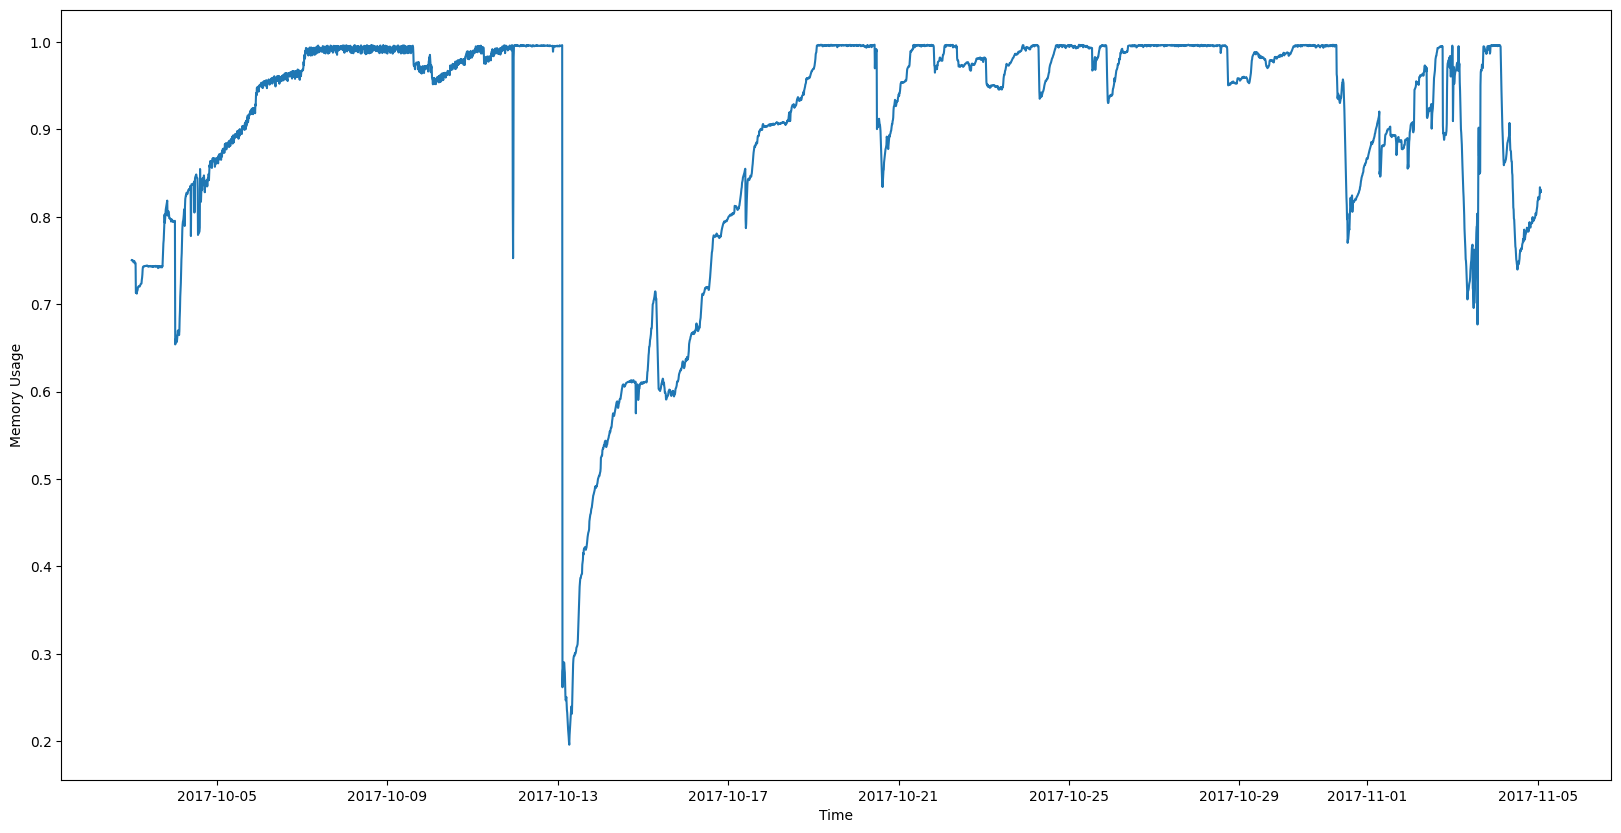

In [51]:
 #plot
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['mem_usage'])
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.show()


In [52]:
#Isolation Forest
from sklearn.ensemble import IsolationForest

In [55]:
# fit the model
model = IsolationForest(contamination=0.05)
model.fit(data[['mem_usage']])
data['scores'] = model.decision_function(data[['mem_usage']])
data['anomaly'] = model.predict(data[['mem_usage']])
data

,time,machine_id,mem_total,mem_free,mem_usage,scores,anomaly
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305,0.038126,1
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944,0.037659,1
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268,0.038126,1
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316,0.038126,1
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879,0.037659,1
...,...,...,...,...,...,...,...
4759,2017-11-05 01:10:00+00:00,m21,528272672.0,9.287755e+07,0.824186,0.054902,1
4760,2017-11-05 01:20:00+00:00,m21,528272672.0,8.782440e+07,0.833752,0.050804,1
4761,2017-11-05 01:30:00+00:00,m21,528272672.0,9.101398e+07,0.827714,0.049913,1
4762,2017-11-05 01:40:00+00:00,m21,528272672.0,8.919456e+07,0.831158,0.047808,1


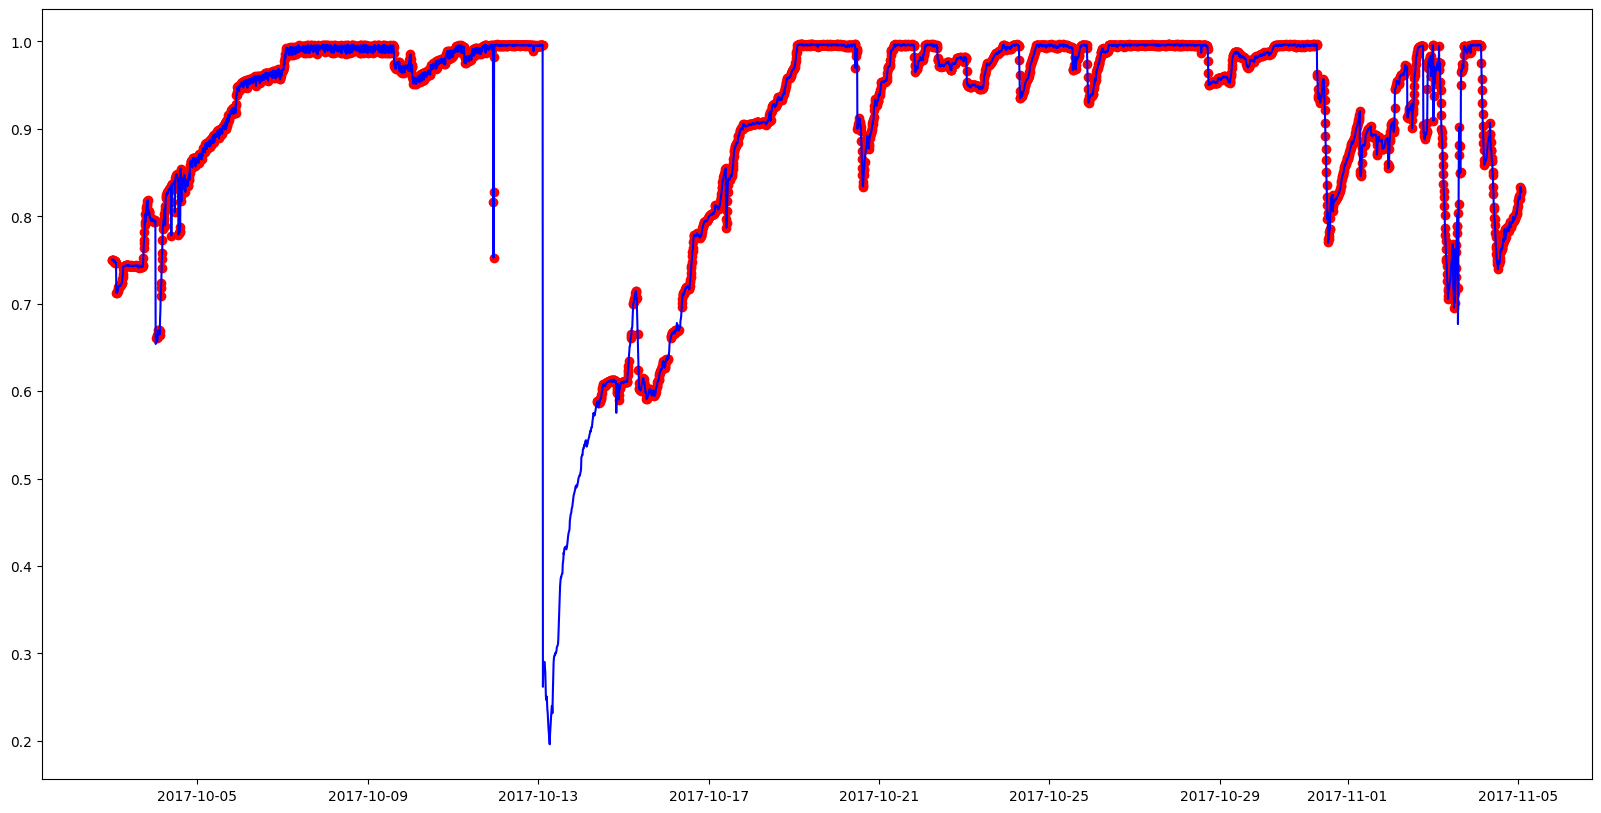

In [56]:
# plot the data
fig, ax = plt.subplots(figsize=(20,10))
 
a = data.loc[data['anomaly'] != -1, ['time', 'mem_usage']] #anomaly

ax.plot(data['time'], data['mem_usage'], color='blue')
ax.scatter(a['time'],a['mem_usage'], color='red')
plt.show()
